In [5]:
# Import standard libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [6]:

# Load the dataset
file_path = ('C:/Users/pamwa/team_project/data/raw/shopping_trends.csv')
data = pd.read_csv(file_path)

In [9]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())

# Display column names
print("\nColumn names in the dataset:")
print(data.columns)

First few rows of the dataset:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shippin

Mean Squared Error: 559.9984322042955
R^2 Score: 0.001525402943547749


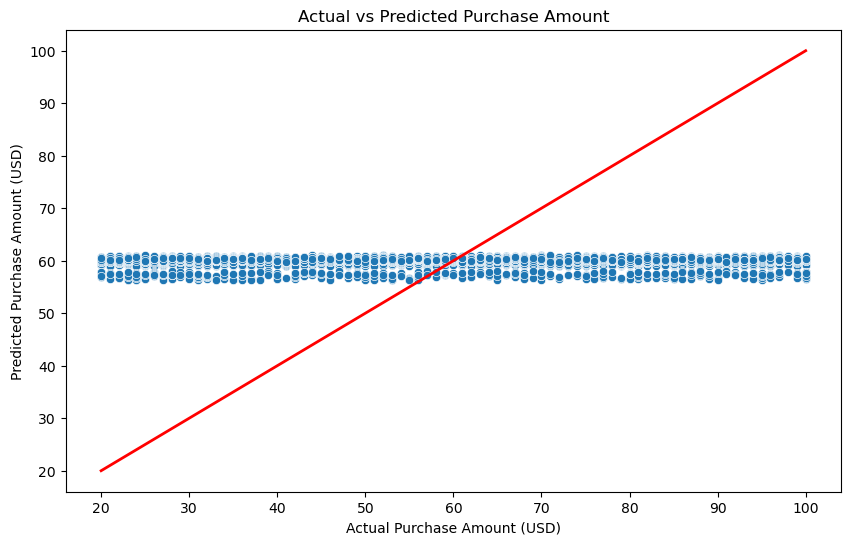

In [14]:
# Encode categorical variables
categorical_features = ['Category', 'Discount Applied']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

# Extract dependent and independent variables
X = data[['Age', 'Category', 'Discount Applied']]
y = data['Purchase Amount (USD)']

# Create a pipeline that transforms the data and fits the model
pipeline = Pipeline(steps=[('transformer', transformer), ('model', LinearRegression())])

# Fit the model
pipeline.fit(X, y)

# Predict the purchase amount
y_pred = pipeline.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=2)
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.title('Actual vs Predicted Purchase Amount')
plt.show()


The model evaluated has a high Mean Squared Error: 559.9984322042955 and very low R^2 Score: 0.001525402943547749, indicating it may not be accurately capturing the relationship between the independent Purchase Amount (USD) and dependent variables in the dataset Age, Category, and Discount Applied.